# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).

Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.4**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.8**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.4) / 0.4)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.

Good luck & have fun! :)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install wandb
!pip3 install pytorch_lightning torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 35.8 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [4]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [5]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [6]:
!wget -O train_link.json "https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key=https://disk.yandex.ru/d/elNF0DS94o2GVA&path=/train.zip"
!wget -O val_link.json "https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key=https://disk.yandex.ru/d/elNF0DS94o2GVA&path=/val.zip"

--2024-11-02 06:11:14--  https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key=https://disk.yandex.ru/d/elNF0DS94o2GVA&path=/train.zip
Resolving cloud-api.yandex.net (cloud-api.yandex.net)... 213.180.204.127, 2a02:6b8::1:127
Connecting to cloud-api.yandex.net (cloud-api.yandex.net)|213.180.204.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 551 [application/json]
Saving to: ‘train_link.json’

train_link.json     100%[===================>]     551  --.-KB/s    in 0s      

2024-11-02 06:11:15 (44.2 MB/s) - ‘train_link.json’ saved [551/551]

--2024-11-02 06:11:15--  https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key=https://disk.yandex.ru/d/elNF0DS94o2GVA&path=/val.zip
Resolving cloud-api.yandex.net (cloud-api.yandex.net)... 213.180.204.127, 2a02:6b8::1:127
Connecting to cloud-api.yandex.net (cloud-api.yandex.net)|213.180.204.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545 [applicat

In [7]:
!wget -O train.zip "https://downloader.disk.yandex.ru/disk/ca60bb19d2c3dd903ffee1561546f434980210c3e427af419a2abcc6f9323628/6725fac3/Io9LBL_80OT83lSolN0dlF4TGtANgdG93W41i-G3ZZfHgcX6xqqbsFSdJx1x0eRuCVYqXgG7MxPP2ZoXe5Xr6w%3D%3D?uid=0&filename=train.zip&disposition=attachment&hash=BpCP10qw/Dch8MoYCFQCg79J6Xmff23QAmNrgywG8CFuw449TXyR3Q9K5aHzyj8zq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/train.zip&limit=0&content_type=application%2Fzip&owner_uid=160934198&fsize=1012110531&hid=4721959a09cb54cf50363d6e046bbe81&media_type=compressed&tknv=v2"

!wget -O val.zip "https://downloader.disk.yandex.ru/disk/11f80a7e5582beb96c5d01a14b31533a403afc56e3a013109d58e200ce87f495/6725fac4/Io9LBL_80OT83lSolN0dlN0st-jGR68sXLrqE4poQ6qPUrlT1Q-DAUHrz7ZCVFxvzKE-xjpvU8znGtsePlmrlw%3D%3D?uid=0&filename=val.zip&disposition=attachment&hash=BpCP10qw/Dch8MoYCFQCg79J6Xmff23QAmNrgywG8CFuw449TXyR3Q9K5aHzyj8zq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/val.zip&limit=0&content_type=application%2Fzip&owner_uid=160934198&fsize=54915547&hid=b0b968b914952ad60d46d6d4347b405f&media_type=compressed&tknv=v2"

--2024-11-02 06:12:29--  https://downloader.disk.yandex.ru/disk/ca60bb19d2c3dd903ffee1561546f434980210c3e427af419a2abcc6f9323628/6725fac3/Io9LBL_80OT83lSolN0dlF4TGtANgdG93W41i-G3ZZfHgcX6xqqbsFSdJx1x0eRuCVYqXgG7MxPP2ZoXe5Xr6w%3D%3D?uid=0&filename=train.zip&disposition=attachment&hash=BpCP10qw/Dch8MoYCFQCg79J6Xmff23QAmNrgywG8CFuw449TXyR3Q9K5aHzyj8zq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/train.zip&limit=0&content_type=application%2Fzip&owner_uid=160934198&fsize=1012110531&hid=4721959a09cb54cf50363d6e046bbe81&media_type=compressed&tknv=v2
Resolving downloader.disk.yandex.ru (downloader.disk.yandex.ru)... 77.88.21.127, 2a02:6b8::2:127
Connecting to downloader.disk.yandex.ru (downloader.disk.yandex.ru)|77.88.21.127|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s1118sas.storage.yandex.net/rdisk/ca60bb19d2c3dd903ffee1561546f434980210c3e427af419a2abcc6f9323628/6725fac3/Io9LBL_80OT83lSolN0dlF4TGtANgdG93W41i-G3ZZfHgcX6xqqbsFSdJx1x0eRuCVYqXgG7MxPP2ZoXe5Xr6w==?uid=0

In [8]:
!unzip train.zip -d train
!unzip val.zip -d val

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjdIvVTUiQNzLYnI1VA7135DnAAKHDQACaFKkAXQgn0FsnbrwLwQ.png  
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjhQoiw1TSUpetpTbfA9XeWr6AAIFAwAC2chQVdlmTBMlQm9sLwQ.png  
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjhS6FecAAUYlj0A9D054Qq-FnwACaQIAAiS_WVVYpe2cLuQxri8E.png  
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjhTxjphHn_hgW0_qJO0zcPgZAALuAwACyBxIVBhsA2eUWrSpLwQ.png  
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjK4w3ylr-gS4wRdlx_0E655MAAJEAgADQJBXOjW1wxhSa74vBA.png  
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjKLmiV1OBHCZMPsqlrqj591GAAJWBQACMTO4VEVRPUzf34acLwQ.png  
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjLhh7dB5DOYMGe96d2qoraf6AAIwAgAC2txxCE4n2gqxxE-FLwQ.png  
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjmIv_yEw_4O5aFTrdmZ2niS5AAIKAAPbjWs0FMCxp9m3LxovBA.png  
  inflating: train/train/U+1F92C/CAACAgUAAxUAAWSdjni7l279EiyY8r7SkD44PVciAAK9

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [9]:
train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #на основе данных из ImageNet
])
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/train', transform=train_transform)
val_dataset = ImageFolder('/content/val', transform=val_transform)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [10]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

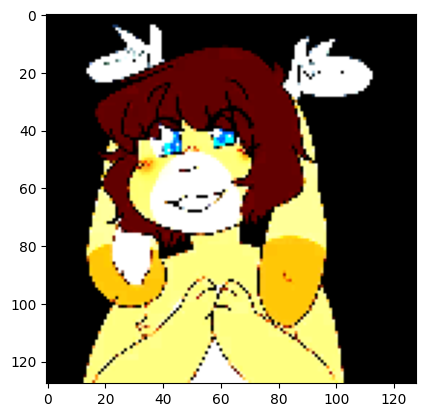

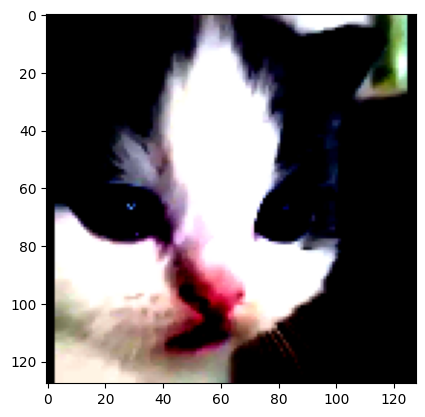

In [11]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

Вдохновлено:

https://medium.com/@khwabkalra1/convolutional-neural-networks-for-image-classification-f0754f7b94aa

In [13]:
class PinkerNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Dropout(0.2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Dropout(0.2),

            nn.AdaptiveAvgPool2d((4, 4)),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 100)
        )

        self.loss_func = nn.CrossEntropyLoss()


        self.correct = 0
        self.total = 0
        self.accuracy = 0.0
    def _forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

    def forward(self, x):
        output = self._forward(x)
        return output

### Тренировочный класс lightning

In [14]:
class PinkerModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.loss_func = torch.nn.CrossEntropyLoss()

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        outputs = self.forward(images)
        loss = self.loss_func(outputs, target)
        preds = torch.argmax(outputs, dim=1)
        acc = (preds == target).float().mean()
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        outputs = self.forward(images)
        loss = self.loss_func(outputs, target)
        preds = torch.argmax(outputs, dim=1)
        acc = (preds == target).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return loss

In [15]:
wandb_logger = WandbLogger(
    project='pinker_net_log',
    log_model='all'
) # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = PinkerNet().to(device)
module = PinkerModule(model, learning_rate=1e-3)

In [17]:
from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints/',
    filename='best_model',
    save_top_k=1,
    verbose=True,
    monitor='val_loss',
    mode='min'
)

trainer = pl.Trainer(
    logger=wandb_logger,
    max_epochs=10,
    callbacks=[checkpoint_callback]
)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: katkulikat (katkulikat-hse-university). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | PinkerNet        | 626 K  | train
1 | loss_func | CrossEntropyLoss | 0      | train
-------------------------------------------------------
626 K     Trainable params
0         Non-trainable params
626 K     Total params
2.506     Total estimated model params size (MB)
22        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 1426: 'val_loss' reached 0.00245 (best 0.00245), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 2852: 'val_loss' reached 0.00051 (best 0.00051), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 4278: 'val_loss' reached 0.00020 (best 0.00020), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 5704: 'val_loss' reached 0.00013 (best 0.00013), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 7130: 'val_loss' reached 0.00003 (best 0.00003), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 8556: 'val_loss' reached 0.00003 (best 0.00003), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 9982: 'val_loss' reached 0.00001 (best 0.00001), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 11408: 'val_loss' reached 0.00001 (best 0.00001), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 12834: 'val_loss' reached 0.00001 (best 0.00001), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 14260: 'val_loss' reached 0.00000 (best 0.00000), saving model to '/content/checkpoints/best_model.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


### Валидация результатов задания

In [20]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            total_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
    accuracy = total_correct / total_samples
    return accuracy

In [21]:
module = PinkerModule.load_from_checkpoint(
    checkpoint_path='checkpoints/best_model.ckpt',
    model=PinkerNet(),
    learning_rate=1e-3
)

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(5 * accuracy / 0.4, 0, 5):.2f} баллов")

100%|██████████| 79/79 [00:02<00:00, 27.28it/s]

Оценка за это задание составит 5.00 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [26]:
from torchvision.models import resnet18
model = models.resnet18(pretrained=True)

### Тренировочный класс lightning

In [29]:
from torchmetrics.functional import accuracy as tm_accuracy

In [30]:
class PinkerResnet(pl.LightningModule):
    def __init__(self, num_classes=100, pretrained: bool = False, learning_rate=1e-3):
        super().__init__()
        self.pretrained = pretrained
        self.num_classes = num_classes
        self.learning_rate = learning_rate

        if pretrained:
            self.model = resnet18(pretrained=True)
            self.model.fc = nn.Identity()
            self.classifier = nn.Linear(512, num_classes)
            self.optimizer = torch.optim.Adam(self.classifier.parameters(), lr=self.learning_rate)
            for param in self.model.parameters():
                param.requires_grad = False
        else:
            self.model = resnet18(pretrained=False)
            self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        if self.pretrained:
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = tm_accuracy(torch.argmax(preds, dim=-1), target, task='multiclass', num_classes=self.num_classes)
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = tm_accuracy(torch.argmax(preds, dim=-1), target, task='multiclass', num_classes=self.num_classes)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", acc, prog_bar=True)

In [32]:
wandb_logger = WandbLogger(
    project='pinker_resnet_log',
    log_model='all'
) # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = PinkerResnet(num_classes=100, pretrained=True, learning_rate=1e-3)

In [41]:
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints/',
    filename='best_resnet_model',
    save_top_k=1,
    verbose=True,
    monitor='val_loss',
    mode='min'
)


trainer = pl.Trainer(
    logger=wandb_logger,
    callbacks=[checkpoint_callback],
    max_epochs=10
)


trainer.fit(model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model      | ResNet           | 11.2 M | train
1 | classifier | Linear           | 51.3 K | train
2 | loss       | CrossEntropyLoss | 0      | train
--------------------------------------------------------
51.3 K    Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.911    Total estimated model params size (MB)
70        Module

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 1426: 'val_loss' reached 0.00009 (best 0.00009), saving model to '/content/checkpoints/best_resnet_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 2852: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 4278: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/content/checkpoints/best_resnet_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 5704: 'val_loss' reached 0.00004 (best 0.00004), saving model to '/content/checkpoints/best_resnet_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 7130: 'val_loss' reached 0.00001 (best 0.00001), saving model to '/content/checkpoints/best_resnet_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 8556: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 9982: 'val_loss' reached 0.00001 (best 0.00001), saving model to '/content/checkpoints/best_resnet_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 11408: 'val_loss' reached 0.00001 (best 0.00001), saving model to '/content/checkpoints/best_resnet_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 12834: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 14260: 'val_loss' reached 0.00000 (best 0.00000), saving model to '/content/checkpoints/best_resnet_model.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


### Валидация результатов задания

In [42]:
module = PinkerResnet.load_from_checkpoint(
    checkpoint_path='checkpoints/best_resnet_model.ckpt',
    num_classes=100,
    pretrained=True,
    learning_rate=1e-3
)

In [43]:
accuracy = evaluate_task(module, val_dataloader)
print(f"Оценка за это задание составит {np.clip(5 * (accuracy - 0.4) / 0.4, 0, 5):.2f} баллов")


100%|██████████| 79/79 [00:04<00:00, 19.39it/s]

Оценка за это задание составит 5.00 баллов


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

В ходе работы были проведены два эксперимента по обучению моделей для задачи классификации на 100 классов. Первый эксперимент использовал модель PinkerNet, которая представляет собой собственную нейронную сеть с свёрточными и полносвязными слоями. Гиперпараметры были установлены следующим образом: скорость обучения 1e-3, оптимизатор Adam и количество эпох равное 10. В результате обучения наблюдалось стабильное снижение потери на валидационном наборе данных с каждой эпохой. Начальная валидационная потеря составляла 0.00245 и постепенно уменьшалась до практически нулевых значений к последней эпохе. Такое быстрое и значительное снижение потери может указывать на риск переобучения, поскольку модель может слишком хорошо подстроиться под обучающие данные и не обобщать на новые данные.

Во втором эксперименте была использована модель PinkerResnet, основанная на предобученной модели ResNet18 с заменой последнего слоя для адаптации под 100 классов. При обучении использовались предобученные веса, и все слои модели были заморожены, кроме последнего классификатора. Гиперпараметры оставались такими же, как в первом эксперименте. Результаты показали ещё более быстрое снижение потери на валидационном наборе данных, начиная с 0.00009 на первой эпохе и достигая практически нулевых значений к последней эпохе. Использование предобученной модели позволило достичь низкой потери уже на ранних этапах обучения, однако риск переобучения также присутствует и требует внимания.

Сравнивая результаты обоих экспериментов, можно отметить, что обе модели демонстрируют хорошую сходимость и быстрое снижение потерь на валидации. Однако практически нулевые значения потери могут быть признаком переобучения, но я не знаю, как это исправить (если честно, я уже ничего не понимаю).

Ссылка на wandb: https://wandb.ai/katkulikat-hse-university/pinker_net_log/workspace